# Project Description: Twitter US Airline Sentiment

### Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from
February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

### Dataset:
The project is from a dataset from Kaggle.
Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
The dataset has to be downloaded from the above Kaggle website.

The dataset has the following columns:

- tweet_id
- airline_sentiment
- airline_sentiment_confidence
- negativereason
- negativereason_confidence
- airline
- airline_sentiment_gold
- name
- negativereason_gold
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location
- user_timezone

### Objective:
To implement the techniques learnt as a part of the course.

### Learning Outcomes:

- Basic understanding of text pre-processing.
- What to do after text pre-processing:
 - Bag of words
 - Tf-idf
- Build the classification model.
- Evaluate the Model.

### Steps and tasks:

- 1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)
- 2. Understand of data-columns: (5 Marks)
   - a. Drop all other columns except “text” and “airline_sentiment”.
   - b. Check the shape of data.
   - c. Print first 5 rows of data.
- 3. Text pre-processing: Data preparation. (20 Marks)
   - a. Html tag removal.
   - b. Tokenization.
   - c. Remove the numbers.
   - d. Removal of Special Characters and Punctuations.
   - e. Conversion to lowercase.
   - f. Lemmatize or stemming.
   - g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)
   - h. Print first 5 rows of data after pre-processing.
- 4. Vectorization: (10 Marks)
   - a. Use CountVectorizer.
   - b. Use TfidfVectorizer.
- 5. Fit and evaluate model using both type of vectorization. (6+6 Marks)
- 6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks)

#### 1) Import the libraries, load dataset, print shape of data, data description. (5 Marks)

In [1]:
import pandas as pd
import numpy as np

#Seaborn for visualization
import seaborn as sns

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

import re, string, unicodedata
from bs4 import BeautifulSoup

#Natural language processing tool-kit
import nltk

#!pip install contractions
import contractions

nltk.download('wordnet')
nltk.download('punkt')

from nltk.tokenize import word_tokenize 
from nltk.stem import LancasterStemmer, WordNetLemmatizer

#scikit-learn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_confusion_matrix
from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\deval\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deval\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#load tweets Data Set
TW_DF = pd.read_csv('Tweets.csv')
TW_DF.head(15)

tweet_id airline_sentiment  airline_sentiment_confidence  \
0   570306133677760513           neutral                        1.0000   
1   570301130888122368          positive                        0.3486   
2   570301083672813571           neutral                        0.6837   
3   570301031407624196          negative                        1.0000   
4   570300817074462722          negative                        1.0000   
5   570300767074181121          negative                        1.0000   
6   570300616901320704          positive                        0.6745   
7   570300248553349120           neutral                        0.6340   
8   570299953286942721          positive                        0.6559   
9   570295459631263746          positive                        1.0000   
10  570294189143031808           neutral                        0.6769   
11  570289724453216256          positive                        1.0000   
12  570289584061480960          positive                        1.0000   
13  570287408438120448          positive                        0.6451   
14  570285904809598977          positive                        1.0000   

   negativereason  negativereason_confidence         airline  \
0             NaN                        NaN  Virgin America   
1             NaN                     0.0000  Virgin America   
2             NaN                        NaN  Virgin America   
3      Bad Flight                     0.7033  Virgin America   
4      Can't Tell                     1.0000  Virgin America   
5      Can't Tell                     0.6842  Virgin America   
6             NaN                     0.0000  Virgin America   
7             NaN                        NaN  Virgin America   
8             NaN                        NaN  Virgin America   
9             NaN                        NaN  Virgin America   
10            NaN                     0.0000  Virgin America   
11            NaN                        NaN  Virgin America   
12            NaN                        NaN  Virgin America   
13            NaN                        NaN  Virgin America   
14            NaN                        NaN  Virgin America   

   airline_sentiment_gold             name negativereason_gold  retweet_count  \
0                     NaN          cairdin                 NaN              0   
1                     NaN         jnardino                 NaN              0   
2                     NaN       yvonnalynn                 NaN              0   
3                     NaN         jnardino                 NaN              0   
4                     NaN         jnardino                 NaN              0   
5                     NaN         jnardino                 NaN              0   
6                     NaN       cjmcginnis                 NaN              0   
7                     NaN            pilot                 NaN              0   
8                     NaN         dhepburn                 NaN              0   
9                     NaN       YupitsTate                 NaN              0   
10                    NaN  idk_but_youtube                 NaN              0   
11                    NaN     HyperCamiLax                 NaN              0   
12                    NaN     HyperCamiLax                 NaN              0   
13                    NaN     mollanderson                 NaN              0   
14                    NaN         sjespers                 NaN              0   

                                                 text tweet_coord  \
0                 @VirginAmerica What @dhepburn said.         NaN   
1   @VirginAmerica plus you've added commercials t...         NaN   
2   @VirginAmerica I didn't today... Must mean I n...         NaN   
3   @VirginAmerica it's really aggressive to blast...         NaN   
4   @VirginAmerica and it's a really big bad thing...         NaN   
5   @VirginAmerica seriously would pay $30 a fligh...         NaN   
6   @VirginAmerica yes, 

In [3]:
#Show last 15 records
TW_DF.tail(15)

tweet_id airline_sentiment  airline_sentiment_confidence  \
14625  569589643487928321          positive                        1.0000   
14626  569589460226183168          negative                        1.0000   
14627  569588816438169600          negative                        1.0000   
14628  569588651925098496          positive                        1.0000   
14629  569588591602458624          negative                        1.0000   
14630  569588473050611712          positive                        1.0000   
14631  569588464896876545          negative                        1.0000   
14632  569587813856841728           neutral                        0.6760   
14633  569587705937600512          negative                        1.0000   
14634  569587691626622976          negative                        0.6684   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence   airline  \
14625                     NaN                        NaN  American   
14626             Late Flight                     1.0000  American   
14627        Cancelled Flight                     1.0000  American   
14628                     NaN                        NaN  American   
14629  Customer Service Issue                     1.0000  American   
14630                     NaN                        NaN  American   
14631              Bad Flight                     1.0000  American   
14632                     NaN                     0.0000  American   
14633        Cancelled Flight                     1.0000  American   
14634             Late Flight                     0.6684  American   
14635                     NaN                     0.0000  American   
14636  Customer Service Issue                     1.0000  American   
14637                     NaN                        NaN  American   
14638  Customer Service Issue                     0.6659  American   
14639                     NaN                     0.0000  American   

      airline_sentiment_gold             name negativereason_gold  \
14625                    NaN   DrCaseyJRudkin                 NaN   
14626                    NaN       cataattack                 NaN   
14627                    NaN   KristinaMeyer7                 NaN   
14628                    NaN         jlhalldc                 NaN   
14629                    NaN      jontgreen89                 NaN   
14630                    NaN   Laurelinesblog                 NaN   
14631                    NaN         MDDavis7                 NaN   
14632                    NaN       Chad_SMFYM                 NaN   
14633                    NaN  RussellsWriting                 NaN   
14634                    NaN    GolfWithWoody                 NaN   
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count                                               text  \
14625              0  @AmericanAir Flight 236 was great. Fantastic c...   
14626              0  @AmericanAir Flight 953 NYC-Buenos Aires has b...   
14627              0  @AmericanAir Flight Cancelled Flightled, can't...   
14628              0  Thank you. “@AmericanAir: @jlhalldc Customer R...   
14629              0  @AmericanAir How do I change my flight if the ...   
14630              0                        @AmericanAir Thanks! He is.   
14631              0  @AmericanAi

In [4]:
#Print shape of data
TW_DF.shape

(14640, 15)

In [5]:
TW_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
#Data Description
TW_DF.describe()

tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               10522.000000   
mean   5.692184e+17                      0.900169                   0.638298   
std    7.791112e+14                      0.162830                   0.330440   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685592e+17                      0.692300                   0.360600   
50%    5.694779e+17                      1.000000                   0.670600   
75%    5.698905e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count  
count   14640.000000  
mean        0.082650  
std         0.745778  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000

In [7]:
#Check Null values
TW_DF.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [8]:
#Check NA values
TW_DF.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [9]:
#Number of unique values in each column
TW_DF.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [10]:
#Check if tweet data set has duplicate records
TW_DF_Duplicate = TW_DF[TW_DF.duplicated()]
TW_DF_Duplicate.head(15)

tweet_id airline_sentiment  airline_sentiment_confidence  \
12040  570308309682675712          negative                           1.0   
12059  570305051819941889           neutral                           1.0   
12063  570303383782989824           neutral                           1.0   
12066  570301929580048385           neutral                           1.0   
12068  570301395141836801          negative                           1.0   
12069  570300915418320897          negative                           1.0   
12074  570299252141903873          positive                           1.0   
12075  570298770136674304          negative                           1.0   
12078  570298644475346945          negative                           1.0   
12079  570298371140939776          negative                           1.0   
12086  570296996445204480          negative                           1.0   
12093  570295576446808065          negative                           1.0   
12097  570292403309035520           neutral                           1.0   
12099  570291157340704769          positive                           1.0   
12102  570290334158225408          positive                           1.0   

               negativereason  negativereason_confidence   airline  \
12040  Customer Service Issue                        1.0  American   
12059                     NaN                        NaN  American   
12063                     NaN                        NaN  American   
12066                     NaN                        NaN  American   
12068             Late Flight                        1.0  American   
12069        Cancelled Flight                        1.0  American   
12074                     NaN                        NaN  American   
12075  Customer Service Issue                        1.0  American   
12078  Customer Service Issue                        1.0  American   
12079             Late Flight                        1.0  American   
12086             Late Flight                        1.0  American   
12093  Customer Service Issue                        1.0  American   
12097                     NaN                        NaN  American   
12099                     NaN                        NaN  American   
12102                     NaN                        NaN  American   

      airline_sentiment_gold             name negativereason_gold  \
12040                    NaN       SweeLoTmac                 NaN   
12059                    NaN    Chandrafaythe                 NaN   
12063                    NaN   trentgillaspie                 NaN   
12066                    NaN        FinEdChat                 NaN   
12068                    NaN       JoBarredaV                 NaN   
12069                    NaN  LancasterPattie                 NaN   
12074                    NaN           Mtts28                 NaN   
12075                    NaN         law_econ                 NaN   
12078                    NaN      denismishin                 NaN   
12079                    NaN      djjohnpayne                 NaN   
12086                    NaN     aaronmsantos                 NaN   
12093                    NaN    HollyKinnamon                 NaN   
12097                    NaN     pbpinftworth                 NaN   
12099                    NaN      mpresdenver                 NaN   
12102                    NaN      oobunillaoo                 NaN   

       retweet_count                                               text  \
12040              0  @AmericanAir why would I even consider continu...   
12059              0  @AmericanAir my flight got Cancelled Flightled...   
12063              0  .@AmericanAir just disappointed with the Fligh...   
12066              0                                 @AmericanAir I did   
12068              1  @AmericanAir r u serious?? 304min #delay with ...   
12069              0  @AmericanAir You are jumping the gun and Cance...   
12074              0  @AmericanAi

In [11]:
#There are some duplicate records, that first needs to be taken care of.
TW_DF_Duplicate.shape

(36, 15)

In [12]:
#Remove duplicate values
TW_DF.drop_duplicates(keep=False,inplace=True) 

In [13]:
#Print shape of data after removing duplicate values
TW_DF.shape

(14568, 15)

In [14]:
#Data Description after removing duplicate values
TW_DF.describe()

tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.456800e+04                  14568.000000               10484.000000   
mean   5.692131e+17                      0.899675                   0.636987   
std    7.773880e+14                      0.163080                   0.330318   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685551e+17                      0.691975                   0.360300   
50%    5.694655e+17                      1.000000                   0.670400   
75%    5.698859e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count  
count   14568.000000  
mean        0.082921  
std         0.747520  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000

#### 2) Understand of data-columns: (5 Marks)

In [15]:
#List the all columns available in the tweet data set.
TW_DF.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [16]:
#Drop all other columns except “text” and “airline_sentiment”
TW_DF_Update = TW_DF.drop(['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], axis =1)

In [17]:
#Check the shape of data
TW_DF_Update.shape

(14568, 2)

In [18]:
#Print first 5 rows of tweet data set.
TW_DF_Update.head(5)

airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...

#### 3) Text pre-processing: Data preparation. (20 Marks)

In [19]:
#HTML tag removal function
def html_Remove(data_param):  
  review_text = BeautifulSoup(data_param).get_text()
  return review_text

In [20]:
#Tokenization function
def tokenization_Perform(data_param):  
  word_tokens = word_tokenize(data_param)
  return word_tokens

In [21]:
#Numbers Removal function
def number_Remove(list_of_words): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

In [22]:
#Removal of Special Characters and Punctuations functions
def special_character_Remove(lst_of_words): 
    pattern = '[^A-Za-z0-9]+'
    list = [re.sub(pattern, '', i) for i in lst_of_words] 
    return list

def punctuation_Remove(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [23]:
#Conversion to lowercase function
def lowercase_Convert(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        
    for word in words:
        new_word = word.lower()           
        new_words.append(new_word)        
    return new_words

In [24]:
#Lemmatize and stemming functions

def stem_words(words):
    """Stem words"""
    stemmer = LancasterStemmer()
    stems = []                            
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                
    return stems

#or

def lemmatize_words(words):
    """Lemmatize words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              
    return lemmas

In [25]:
#Remove empty String function
def empty_str_Remove(words):
  return list(filter(None, words))

In [26]:
#Replace Contraction function
def contractions_Replace(data_param):
    #Replace contractions in data_param
    return contractions.fix(data_param)

In [27]:
#Pre-Processing function
def pre_Processing_Func(data_param):
    inner_Pre_Processing = html_Remove(data_param)
    inner_Pre_Processing = contractions_Replace(inner_Pre_Processing)
    inner_Pre_Processing = tokenization_Perform(inner_Pre_Processing)
    inner_Pre_Processing = number_Remove(inner_Pre_Processing)
    inner_Pre_Processing = special_character_Remove(inner_Pre_Processing)
    inner_Pre_Processing = punctuation_Remove(inner_Pre_Processing)
    inner_Pre_Processing = lowercase_Convert(inner_Pre_Processing)
    inner_Pre_Processing = empty_str_Remove(inner_Pre_Processing)
    inner_Pre_Processing = lemmatize_words(inner_Pre_Processing) #clean_review = stem_words(clean_review)
    return inner_Pre_Processing

In [28]:
#Check before pre-processing
TW_DF_Update.head()

airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...

In [29]:
#Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)

pre_Processing_Tweets = []

for i, row in TW_DF_Update.iterrows():
    words = TW_DF_Update.at[i, 'text']
    words = pre_Processing_Func(words)
    TW_DF_Update.at[i,'text'] = " ".join( words )
    pre_Processing_Tweets.append( TW_DF_Update.at[i, 'text'] )
TW_DF_Update.head(50)
TW_DF_Update.style.set_properties(subset=['text'], **{'width': '400px'})

In [30]:
#Print first 5 rows of data after pre-processing.
TW_DF_Update.head(5)

airline_sentiment                                               text
0           neutral                    virginamerica what dhepburn say
1          positive  virginamerica plus you have add commercials to...
2           neutral  virginamerica i do not today must mean i need ...
3          negative  virginamerica it be really aggressive to blast...
4          negative  virginamerica and it be a really big bad thing...

#### 4) Vectorization: (10 Marks)

In [31]:
##Use CountVectorizer
vectorizer_count_DF = CountVectorizer(analyzer="word",tokenizer = None,preprocessor = None, stop_words = None,max_features = 5000) 
vectorizer_features_DF = vectorizer_count_DF.fit_transform(pre_Processing_Tweets)
vectorizer_features_DF = vectorizer_features_DF.toarray()

In [32]:
print (vectorizer_features_DF.shape)
print(vectorizer_features_DF)

(14568, 5000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
#Take a look at the words in the vocabulary
vectorizer_vocab_DF = vectorizer_count_DF.get_feature_names()
print (vectorizer_vocab_DF)

['aa', 'aacom', 'aadv', 'aadvantage', 'aafail', 'aal', 'aano', 'aarp', 'abandon', 'abc', 'abcnetwork', 'abilities', 'ability', 'able', 'aboard', 'about', 'above', 'abq', 'abroad', 'absolute', 'absolutely', 'absurd', 'abt', 'abuse', 'abysmal', 'ac', 'accept', 'acceptable', 'access', 'accident', 'accidentally', 'accommodate', 'accommodations', 'accomplish', 'accord', 'accordingly', 'account', 'accountability', 'accrue', 'acct', 'accts', 'accurate', 'accuse', 'achieve', 'acknowledge', 'acknowledgement', 'acknowledgment', 'acquire', 'acquisition', 'across', 'act', 'action', 'activate', 'active', 'activitiesprevention', 'actual', 'actually', 'ad', 'adam', 'add', 'addition', 'additional', 'address', 'addtl', 'adjacent', 'admiral', 'admirals', 'admit', 'adopt', 'adore', 'ads', 'adult', 'advance', 'advantage', 'advertise', 'advice', 'advise', 'advisories', 'advisory', 'aerojobmarket', 'affect', 'affiliate', 'afford', 'affordable', 'afraid', 'after', 'afterall', 'afternoon', 'again', 'against',

In [34]:
#Stop words
vectorizer_stop_words_DF = vectorizer_count_DF.get_stop_words()
print ('Stop Words present:', vectorizer_stop_words_DF)

Stop Words present: None


In [35]:
#Sum of each word vocabulary
dist_DF = np.sum(vectorizer_features_DF, axis=0)
for tag, count in zip(vectorizer_vocab_DF, dist_DF):
    print (count, tag)

274 aa
3 aacom
2 aadv
10 aadvantage
2 aafail
2 aal
2 aano
3 aarp
3 abandon
8 abc
3 abcnetwork
2 abilities
5 ability
119 able
4 aboard
509 about
18 above
9 abq
2 abroad
22 absolute
30 absolutely
13 absurd
7 abt
3 abuse
6 abysmal
9 ac
32 accept
23 acceptable
39 access
5 accident
4 accidentally
26 accommodate
8 accommodations
4 accomplish
11 accord
4 accordingly
80 account
6 accountability
2 accrue
10 acct
2 accts
10 accurate
2 accuse
3 achieve
4 acknowledge
2 acknowledgement
2 acknowledgment
2 acquire
2 acquisition
16 across
18 act
13 action
2 activate
4 active
2 activitiesprevention
21 actual
86 actually
4 ad
2 adam
126 add
4 addition
17 additional
52 address
3 addtl
2 adjacent
5 admiral
12 admirals
6 admit
6 adopt
2 adore
5 ads
2 adult
14 advance
15 advantage
11 advertise
9 advice
20 advise
2 advisories
24 advisory
2 aerojobmarket
15 affect
3 affiliate
13 afford
3 affordable
2 afraid
467 after
2 afterall
30 afternoon
391 again
6 against
15 age
6 agency
257 agent
155 agents
1 agentthen


2 command
14 comment
11 commercial
6 commercials
4 commit
6 commitment
8 common
2 comms
13 communicate
41 communication
2 communicationfail
5 communications
3 community
9 comp
42 companion
90 company
7 compare
10 compassion
2 compatible
3 comped
31 compensate
36 compensation
3 compete
3 competent
4 competition
3 competitor
2 competitors
20 complain
45 complaint
26 complaints
35 complete
37 completely
2 compliant
3 complicate
7 compliment
9 complimentary
2 compound
2 comps
45 computer
14 computers
3 con
2 concentrate
3 concept
44 concern
4 concert
6 concourse
2 condescend
20 condition
2 condomrito
2 conection
27 conf
9 conference
3 confidence
4 confident
76 confirm
66 confirmation
2 confirmations
6 conflict
15 confuse
7 confusion
17 congrats
4 congratulations
130 connect
151 connection
36 connections
4 connector
4 consecutive
31 consider
2 considerable
5 consideration
2 consistency
9 consistent
8 consistently
2 consolation
6 constant
5 constantly
2 construction
3 consumers
9 cont
121 co

55 jet
4 jetbae
2393 jetblue
2 jetblueblues
2 jetbluebos
2 jetbluecheeps
2 jetbluefail
3 jetbluerocks
3 jetbluesofly
14 jetway
2 jezziegoldz
188 jfk
3 jfklax
11 jh
2 jim
2 jimcramer
2 jimmy
3 jj
2 jkf
3 jms
3 joanna
90 job
2 joe
8 john
10 join
52 joke
2 jokers
6 jose
2 josephtreis
16 journal
6 journey
7 jp
6 jt
3 jtrexsocial
14 juan
3 julie
5 july
13 jump
7 june
963 just
2 justify
2 justsaying
2 justynmoro
5 jvmchat
2 karajusto
8 karen
2 kate
2 kax
2 kay
5 kc
2 kci
3 kciairport
211 keep
6 kelly
2 kelsey
2 kentuckymbb
2 kevin
2 kewl
7 key
14 kick
95 kid
21 kill
2 killeen
3 kim
42 kind
4 kindle
5 kindness
2 king
3 kingscollegelondon
4 kiosk
6 kiosks
5 kit
4 kn
3 knees
438 know
2 knowledge
2 knoxville
2 korea
11 kp
4 kphl
9 ktn
30 kudos
2 kul
2 ky
4 kylejudah
44 la
2 labor
60 lack
5 ladies
25 lady
12 ladygaga
3 lag
10 laguardia
2 laguardiaair
5 lake
12 lame
2 lan
179 land
10 lap
9 laptop
11 large
3 larger
2 largest
2 larry
46 las
3 lasairport
305 last
424 late
3 latimes
12 lauderdale
7 la

16 spring
2 sprinkle
3 sprint
2 square
2 squawk
3 srq
3 srsly
4 srvc
122 st
191 staff
2 staffer
2 stairs
3 stall
37 stand
8 standard
4 standards
51 standby
2 standbye
2 standbys
14 star
8 staralliance
2 starbucks
128 start
2 startle
3 starve
6 stat
35 state
9 statement
5 station
109 status
75 stay
18 steal
2 steam
2 steel
2 steer
6 stellar
31 step
2 stephenrodrick
2 steve
15 stewardess
3 stewardesses
186 stick
2 sticker
581 still
2 stillnobags
3 stillwaiting
8 stink
11 stl
2 stndby
5 stock
2 stocker
2 stoke
3 stone
108 stop
3 storage
2 store
4 stories
40 storm
23 story
3 stow
16 straight
2 straighten
97 strand
4 strange
2 stranger
4 strangers
4 strategy
3 stray
6 stream
21 street
13 stress
8 stressful
2 stretch
8 strike
3 strip
2 strive
8 stroller
2 strollers
5 strong
3 strongly
2 structure
2 struggle
5 stt
2 stuckinmemphis
8 student
4 students
25 stuff
5 stun
8 stupid
4 style
35 submit
5 subpar
2 subscribe
2 subsequent
2 substitute
7 success
54 such
111 suck
3 sudden
2 sue
4 suffer
19

3 wichita
2 wide
86 wife
126 wifi
1228 will
42 win
8 wind
25 window
3 windows
7 wine
6 wing
2 winner
11 winners
34 winter
3 winterstorm
4 winterweather
4 wipe
2 wire
48 wish
1511 with
16 within
104 without
3 witness
2 wk
4 wknd
2 wkrb
5 wks
3 wld
3 wmcactionnews
3 wmy
2 wn
4 wno
3 woaw
26 wof
15 woman
7 women
40 wonder
29 wonderful
3 woo
3 woof
4 woohoo
44 word
407 work
2 workaround
4 worker
11 workers
49 world
54 worry
62 worse
240 worst
5 worstairline
8 worstairlineever
7 worstcustomerservice
3 worstcustomerserviceever
2 worstflight
3 worstflightever
3 worstunitedflightsever
29 worth
6 worthless
737 would
2 wouldbe
2 wound
3 wour
10 wout
45 wow
3 wrap
5 wreck
33 write
76 wrong
2 wrongfully
15 wsj
41 wtf
8 wth
2 wudda
2 wut
2 wx
10 wyou
3 xdaily
3 xday
3 xna
2 xoxo
2 xt
3 xweekly
7 xx
13 ya
2 yards
11 yay
12 yea
43 yeah
97 year
2 yearly
47 years
15 yell
17 yep
239 yes
4 yest
107 yesterday
154 yet
2 yikes
17 yo
2 yof
11 york
4796 you
2 youareonyourown
3 youk
9 young
2 younger
1735 your

In [36]:
#TfidfVectorizer
tfidf_vectorizer_DF = TfidfVectorizer(analyzer = "word",tokenizer = None, preprocessor = None, stop_words = None,max_features = 5000, min_df=5, max_df=0.7,ngram_range=(1,2)) 
tfidf_vectorizer_features_DF = tfidf_vectorizer_DF.fit_transform(pre_Processing_Tweets)
tfidf_vectorizer_features_DF = tfidf_vectorizer_features_DF.toarray()

In [37]:
print (tfidf_vectorizer_features_DF.shape)
print(tfidf_vectorizer_features_DF)

(14568, 5000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [38]:
#Vocabulary
tfidf_vectorizer_vocab_DF = tfidf_vectorizer_DF.get_feature_names()
print (tfidf_vectorizer_vocab_DF)

['aa', 'aa be', 'aa do', 'aa flight', 'aadvantage', 'able', 'able to', 'about', 'about an', 'about it', 'about my', 'about our', 'about the', 'about this', 'about to', 'about you', 'about your', 'above', 'abq', 'absolute', 'absolutely', 'absurd', 'ac', 'accept', 'acceptable', 'access', 'access to', 'accommodate', 'accord', 'accord to', 'account', 'acct', 'accurate', 'across', 'act', 'action', 'actual', 'actually', 'add', 'add my', 'add to', 'additional', 'address', 'admirals', 'admirals club', 'advance', 'advantage', 'advertise', 'advise', 'advisory', 'affect', 'afford', 'after', 'after an', 'after be', 'after hours', 'after land', 'after my', 'after the', 'after wait', 'afternoon', 'again', 'again for', 'again you', 'age', 'agent', 'agent at', 'agent be', 'agent in', 'agent on', 'agents', 'agents at', 'agents be', 'ago', 'ago and', 'ago be', 'agree', 'ah', 'ahead', 'air', 'aircraft', 'airfare', 'airline', 'airline be', 'airline ever', 'airline have', 'airline in', 'airline that', 'air

In [39]:
#Stop Words
tfidf_vectorizer_stop_words = tfidf_vectorizer_DF.get_stop_words()
print ('Stop Words present:', tfidf_vectorizer_stop_words)

Stop Words present: None


In [40]:
#Sum of each word vocabulary
tf_dist_DF = np.sum(tfidf_vectorizer_features_DF, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(tfidf_vectorizer_vocab_DF, tf_dist_DF):
    print (count, tag)

52.575448320295656 aa
3.449371988650278 aa be
2.5213942907540132 aa do
2.6920149935718545 aa flight
2.888088280018178 aadvantage
23.973326749915035 able
22.261307978187787 able to
86.01317574741131 about
3.4338285744189134 about an
7.394385569570688 about it
10.460858494348765 about my
3.0637300075569835 about our
14.596887808594984 about the
4.459667855132215 about this
6.173004512768676 about to
4.027886856443812 about you
5.752248075564953 about your
5.285452110687755 above
2.778535417165819 abq
6.83130903479284 absolute
9.952846419524633 absolutely
3.767426690977803 absurd
2.5477360071642825 ac
9.409074684611662 accept
6.295798922153386 acceptable
10.59611918045432 access
5.620252958633644 access to
7.176077498601433 accommodate
3.253859342259461 accord
3.253859342259461 accord to
18.69451177853152 account
2.9397096660528255 acct
3.016075974426048 accurate
4.771837277900692 across
5.409395845647152 act
4.084392589057226 action
5.673547995683168 actual
20.414163062911037 actually
29

11.392472199680979 concern
6.2433003258213695 condition
7.845714607894892 conf
17.61882751460593 confirm
16.52521740955816 confirmation
6.506557887434992 confirmation number
4.245293858230388 confuse
5.651930713390989 congrats
27.229140456911203 connect
15.236140318073 connect flight
4.008622378997988 connect to
31.173812606867696 connection
4.169654397350936 connection to
9.902019005420959 connections
8.287513815731225 consider
26.49948673807169 contact
7.009148060459316 contact me
3.397451226715207 contact you
3.707759789628481 contest
11.039934876413914 continue
4.011709313473408 continue to
8.213100339014046 control
20.403441787435465 cool
4.705098421194916 corporate
12.061614170965564 correct
17.165149286532365 cost
3.751023624991425 cost me
3.809567875141081 cost of
59.57561804562159 could
4.681538856810023 could be
6.283139780903331 could get
8.540943336249825 could have
24.67340191277087 could not
6.966718476180512 could you
18.646769588117145 count
10.730363985765964 counter
8

5.954208513396428 in san
2.6179662527958767 in seat
2.6314771290586596 in sfo
2.529334675165953 in st
66.4713185957896 in the
2.980702661357468 in their
6.644275067797986 in this
3.8646985323158214 in time
4.415037852316221 in to
2.9491448369177444 in touch
3.4193842985591805 in vegas
11.49935053184145 in your
3.554294280683473 inbound
2.928365763542393 incident
9.106595594383563 include
4.394736917354252 incompetence
5.003728120934872 incompetent
9.023245698406672 inconvenience
2.7076040700956114 inconvenient
3.933204713724056 increase
3.6030905034701983 incredible
5.289040393949661 incredibly
2.6334995487894237 ind
2.893652952624847 industry
4.243285566432987 infant
10.312634471651931 inflight
4.116875471821859 inflight wifi
29.924229799654093 info
2.2691942857626834 info be
5.828703037155337 info on
6.027545946527018 inform
14.091338356546837 information
2.4754788869700635 initial
3.648740623912204 insane
5.167890340259219 inside
3.0472328356533587 inspire
21.62576240759518 instead


3.745141141567791 one hour
2.626408240696295 one know
16.43924180153107 one of
5.044984929220586 one way
5.276196241025997 ones
38.18954399802596 online
4.0983265948641066 online and
2.6536137313835346 online but
2.854997030022475 online for
59.327106893734616 only
4.472577729471741 only airline
2.83546154044924 only be
5.933457242222281 only one
7.218274146898386 only to
2.751088005070853 only way
4.216103869934335 ontime
5.828318065557999 onto
26.121205081306414 open
2.739822409451969 open seat
6.078625529734477 operate
3.8743985108372745 opportunity
15.363026279046574 option
2.494814039855204 option for
2.5516146336982937 option to
13.22153120075493 options
80.99034208149543 or
7.124192275386956 or be
4.335897309880799 or cancel
3.0903790134324503 or do
3.0760641853666937 or email
3.01118247675286 or just
4.390652971969637 or not
2.868003284802284 or the
21.166650671556148 ord
4.0282198073776705 ord to
7.957241335955255 order
8.877216786335568 original
3.764410559492901 original fli

11.401435246011387 report
4.919368488989301 representative
8.102738679367928 reps
2.19015698511206 republican
2.19015698511206 republican american
20.62536842706756 request
5.6887570913893395 require
4.116135388348243 reroute
3.1251076996265783 rerouted
4.718982889702432 res
17.805376856161757 reschedule
4.467121004040616 reschedule flight
3.0378785668324504 reschedule my
33.56829634886142 reservation
2.495686972984314 reservation and
4.5034654550110504 reservation be
16.97241143654879 reservations
4.479241922459475 reserve
4.937918023971966 resolution
12.131850522567948 resolve
4.543001299953643 respect
22.677125234550182 respond
10.683271930998286 respond to
45.30356012871825 response
4.454826276908765 response be
3.3003358036026813 response from
5.862839942053464 response to
3.238667271727468 responses
3.877774598852154 rest
6.511882904870912 result
3.2526306722992895 retrieve
21.608057321311108 return
6.398366694896848 return flight
4.8534685000427835 return to
3.419635443964123 re

9.354101840000554 tuesday
13.913448285539465 turn
12.290503529687104 tv
27.842883170870568 tweet
15.87296179248259 twice
20.06991084449296 twitter
43.32861586080172 two
6.75760134979229 two days
10.501509070189966 two hours
3.056657496566019 two of
2.7203485115464994 two weeks
3.1677393890172647 tx
5.0439624431063566 ty
4.493719797585768 type
46.170427777092634 ua
4.2883679978990985 ua be
3.981554079978123 ua from
4.813925230072115 ual
5.770710903422635 ugh
5.639771112628074 uk
7.856868810428218 unable
7.392248669766847 unable to
20.554945131139245 unacceptable
3.567187195480776 unavailable
6.529134239966342 unbelievable
3.1794040408833237 uncomfortable
10.994194141246934 under
2.9670481626953467 under the
25.995215868662132 understand
2.509888582939408 understand but
2.7431043910536537 understand that
5.088165933626901 understand the
3.677933520895387 understand why
8.809477224782404 unfortunately
3.322425720811986 unfriendlyskies
5.527859050516515 unhappy
6.769924010077421 unhelpful


#### 5) Fit and evaluate model using both type of vectorization. (6+6 Marks)

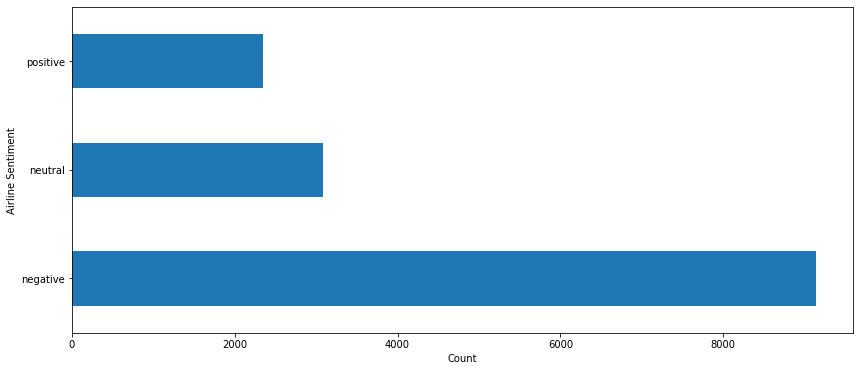

negative    9140
neutral     3083
positive    2345
Name: airline_sentiment, dtype: int64

Note: The data does not seems to be balanced, lots of negative sentiments


In [41]:
#RandomForest Classifier on CountVectorizer
y = TW_DF_Update['airline_sentiment']
plt.figure(figsize=(14,6))
y.value_counts().plot.barh()
plt.xlabel('Count')
plt.ylabel('Airline Sentiment').set_rotation(90)
plt.yticks(rotation=0)
plt.show()
print(y.value_counts())
print()
print('Note: The data does not seems to be balanced, lots of negative sentiments')

In [42]:
#Splitting data to train and test

x = vectorizer_features_DF
y = TW_DF_Update['airline_sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10197, 5000)
(10197,)
(4371, 5000)
(4371,)


In [44]:
#As mentioned in earlier step, the data is not balanced, therefore applying SMOTE (Synthetic Minority Oversampling TEchnique)
smote_DF = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smote_DF.fit_sample(x_train, y_train)

In [45]:
print(X_train_SMOTE.shape)
print(y_train_SMOTE.shape)

(19266, 5000)
(19266,)


In [46]:
y_train_SMOTE

0        negative
1        negative
2        positive
3        negative
4        negative
           ...   
19261    positive
19262    positive
19263    positive
19264    positive
19265    positive
Name: airline_sentiment, Length: 19266, dtype: object

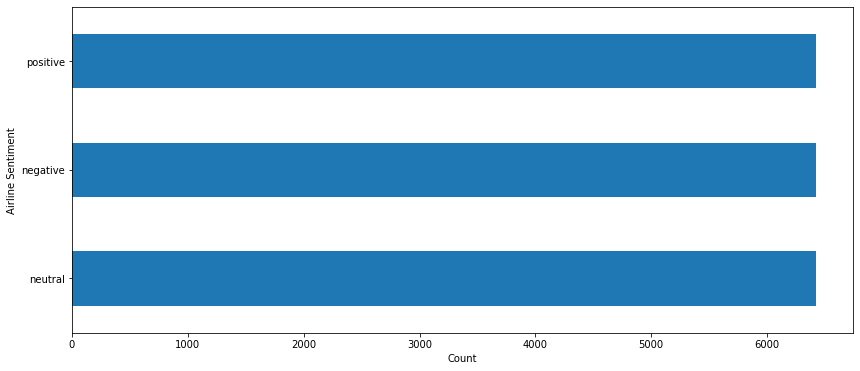

neutral     6422
negative    6422
positive    6422
Name: airline_sentiment, dtype: int64

Note: Now we can see that after applying SMOTE, the data is balanced


In [47]:
#Checking the tweet data set is balanced after applying SMOTE (Synthetic Minority Oversampling TEchnique)
after_smote_airline_sentiment = pd.DataFrame(y_train_SMOTE, columns=['airline_sentiment'])
y = after_smote_airline_sentiment['airline_sentiment']

plt.figure(figsize=(14,6))
y.value_counts().plot.barh()
plt.xlabel('Count')
plt.ylabel('Airline Sentiment').set_rotation(90)
plt.yticks(rotation=0)
plt.show()

print(y.value_counts())
print()
print('Note: Now we can see that after applying SMOTE, the data is balanced')

In [48]:
#Splitting test data set to test and validation data
#Splitting the test data into test and validation set in 50-50 % ratio

x_validation, x_test_main, y_validation, y_test_main = train_test_split(x_test, y_test, test_size=0.50, random_state=1)

print(x_validation.shape)
print(x_test_main.shape)

print(y_validation.shape)
print(y_test_main.shape)

(2185, 5000)
(2186, 5000)
(2185,)
(2186,)


In [49]:
#Initialize a Random Forest classifier with 100 trees

randomforestclassifier = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,criterion='gini', 
                       max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0, warm_start=False) 

randomforestclassifier = randomforestclassifier.fit( X_train_SMOTE, y_train_SMOTE)

In [50]:
print('Random Forest Classifier Score:', randomforestclassifier.score(X_train_SMOTE, y_train_SMOTE))
print('Cross validation Score:',np.mean(cross_val_score(randomforestclassifier,X_train_SMOTE, y_train_SMOTE,cv=10)))

Random Forest Classifier Score: 0.9396345894321603
Cross validation Score: 0.8034481039779576


In [51]:
#Class prediction for the Validation data set
y_validation_predict= randomforestclassifier.predict(x_validation)

In [52]:
#Training and Validation Accuracy
print("Validation accuracy",randomforestclassifier.score(x_validation, y_validation))
print("Training accuracy",randomforestclassifier.score(X_train_SMOTE,y_train_SMOTE))  

Validation accuracy 0.7670480549199085
Training accuracy 0.9396345894321603


In [53]:
#Classification report summary for Validation Set
print(metrics.classification_report(y_validation,y_validation_predict))

              precision    recall  f1-score   support

    negative       0.81      0.91      0.86      1331
     neutral       0.61      0.50      0.55       467
    positive       0.74      0.60      0.66       387

    accuracy                           0.77      2185
   macro avg       0.72      0.67      0.69      2185
weighted avg       0.76      0.77      0.76      2185



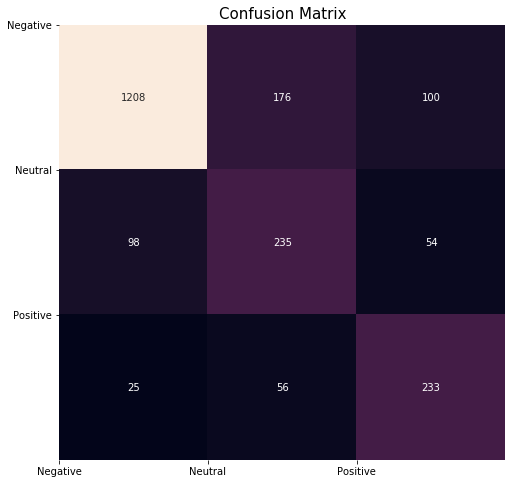

In [54]:
#Confusion Matrix for Validation Set
cm_DF = confusion_matrix(y_validation_predict, y_validation)
plt.figure(figsize=(8,8))
sns.heatmap(cm_DF, annot=True,fmt='.0f',cbar=False)
plt.title('Confusion Matrix', fontsize=15)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'])
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'],rotation=0)
plt.show()

In [55]:
#Testing Data Accuracy
print("Testing accuracy:",randomforestclassifier.score(x_test_main, y_test_main))

Testing accuracy: 0.7634949679780421


In [56]:
#Classification report summary for Test Set
y_test_predict= randomforestclassifier.predict(x_test_main)
print(metrics.classification_report(y_test_main,y_test_predict))

              precision    recall  f1-score   support

    negative       0.83      0.90      0.86      1387
     neutral       0.61      0.49      0.54       465
    positive       0.65      0.60      0.62       334

    accuracy                           0.76      2186
   macro avg       0.69      0.66      0.67      2186
weighted avg       0.75      0.76      0.76      2186



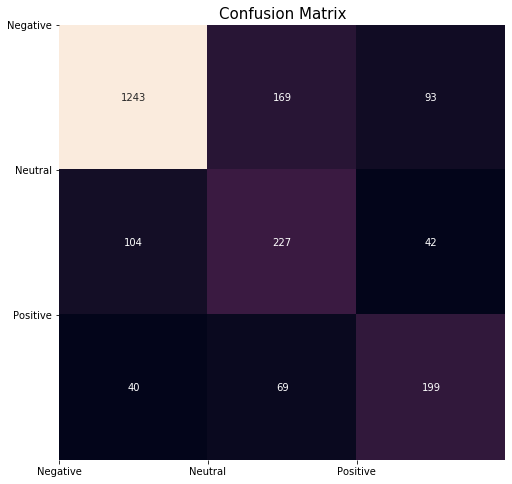

In [57]:
#Confusion Matrix for Test Set
cm_DF = confusion_matrix(y_test_predict, y_test_main)
plt.figure(figsize=(8,8))
sns.heatmap(cm_DF, annot=True,fmt='.0f',cbar=False)
plt.title('Confusion Matrix', fontsize=15)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'])
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'],rotation=0)
plt.show()

In [58]:
#Random Forest Classifier on TfidfVectorizer
#Splitting data set into train and Test
x_tf_idf = tfidf_vectorizer_features_DF
y_tf_idf = TW_DF_Update['airline_sentiment']
x_train_tf_idf, x_test_tf_idf, y_train_tf_idf, y_test_tf_idf = train_test_split(x_tf_idf, y_tf_idf, test_size=0.3, random_state=1)

In [59]:
print(x_train_tf_idf.shape)
print(y_train_tf_idf.shape)
print(x_test_tf_idf.shape)
print(y_test_tf_idf.shape)

(10197, 5000)
(10197,)
(4371, 5000)
(4371,)


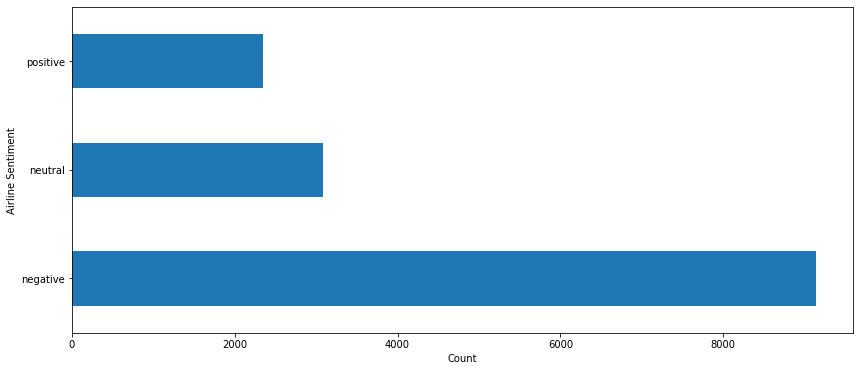

negative    9140
neutral     3083
positive    2345
Name: airline_sentiment, dtype: int64

Note: The data does not seems to be balanced, lots of negative sentiments


In [60]:
y = TW_DF_Update['airline_sentiment']
plt.figure(figsize=(14,6))
y.value_counts().plot.barh()
plt.xlabel('Count')
plt.ylabel('Airline Sentiment').set_rotation(90)
plt.yticks(rotation=0)
plt.show()
print(y.value_counts())
print()
print('Note: The data does not seems to be balanced, lots of negative sentiments')

In [62]:
#As mentioned in earlier step, the data is not balanced, therefore applying SMOTE (Synthetic Minority Oversampling TEchnique)
tf_idf_smt_DF = SMOTE(random_state=0)
X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE = tf_idf_smt_DF.fit_sample(x_train_tf_idf, y_train_tf_idf)

In [63]:
print(X_train_tf_idf_SMOTE.shape)
print(y_train_tf_idf_SMOTE.shape)

(19266, 5000)
(19266,)


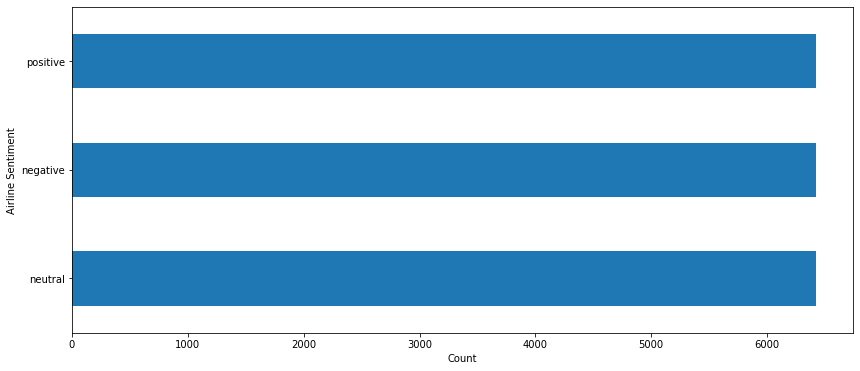

neutral     6422
negative    6422
positive    6422
Name: airline_sentiment, dtype: int64

Note: Now we can see that after applying SMOTE, the data is balanced


In [64]:
#Checking the tweet data set is balanced after applying SMOTE (Synthetic Minority Oversampling TEchnique)
after_smote_airline_sentiment_tf_idf=pd.DataFrame(y_train_tf_idf_SMOTE, columns=['airline_sentiment']) 
y = after_smote_airline_sentiment_tf_idf['airline_sentiment']

plt.figure(figsize=(14,6))
y.value_counts().plot.barh()
plt.xlabel('Count')
plt.ylabel('Airline Sentiment').set_rotation(90)
plt.yticks(rotation=0)
plt.show()

print(y.value_counts())
print()
print('Note: Now we can see that after applying SMOTE, the data is balanced')

In [65]:
#Splitting test data set to test and validation data
#Splitting the test data into test and validation set in 50-50 % ratio

x_validation_tf_idf, x_test_main_tf_idf, y_validation_tf_idf, y_test_main_tf_idf = train_test_split(x_test_tf_idf, y_test_tf_idf, test_size=0.50, random_state=1)

print(x_validation_tf_idf.shape)
print(x_test_main_tf_idf.shape)

print(y_validation_tf_idf.shape)
print(y_test_main_tf_idf.shape)

(2185, 5000)
(2186, 5000)
(2185,)
(2186,)


In [66]:
#Initialize a Random Forest classifier with 100 trees
randomforestclassifier_tf_idf = RandomForestClassifier(verbose=1,n_jobs=-1,n_estimators = 100) 
randomforestclassifier_tf_idf = randomforestclassifier_tf_idf.fit( X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.6s finished


In [67]:
randomforestclassifier_tf_idf.score(X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


0.9977680888612063

In [68]:
print("Cross Validation Score:", np.mean(cross_val_score(randomforestclassifier_tf_idf,X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE,cv=10)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.5s
[Parallel(n

Cross Validation Score: 0.9141071487270848


[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


In [69]:
#Class prediction for the Validation data set
y_validation_predict_tf_idf= randomforestclassifier_tf_idf.predict(x_validation_tf_idf)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


In [70]:
#Training and Validation Accuracy
print("Validation accuracy",randomforestclassifier_tf_idf.score(x_validation_tf_idf, y_validation_tf_idf))
print("Trainig accuracy",randomforestclassifier_tf_idf.score(X_train_tf_idf_SMOTE,y_train_tf_idf_SMOTE))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


Validation accuracy 0.7789473684210526


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s


Trainig accuracy 0.9977680888612063


[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


In [71]:
#Classification report summary for Validation Set
print(metrics.classification_report(y_validation_tf_idf,y_validation_predict_tf_idf))

              precision    recall  f1-score   support

    negative       0.81      0.92      0.86      1331
     neutral       0.64      0.53      0.58       467
    positive       0.79      0.60      0.69       387

    accuracy                           0.78      2185
   macro avg       0.75      0.68      0.71      2185
weighted avg       0.77      0.78      0.77      2185



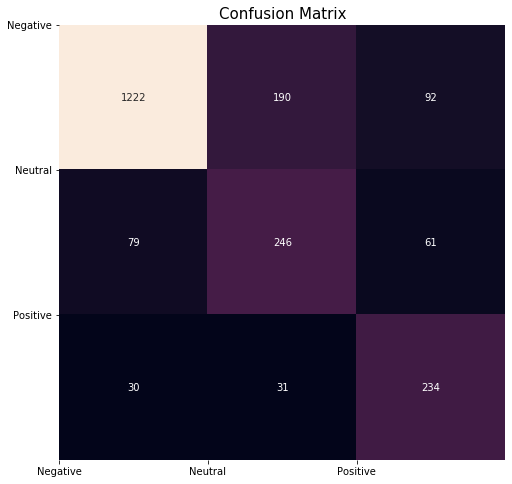

In [72]:
#Confusion Matrix for Validation Set
cm_DF = confusion_matrix(y_validation_predict_tf_idf, y_validation_tf_idf)
plt.figure(figsize=(8,8))
sns.heatmap(cm_DF, annot=True,fmt='.0f',cbar=False)
plt.title('Confusion Matrix', fontsize=15)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'])
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'],rotation=0)
plt.show()

In [73]:
#Testing Data Accuracy
print("Test accuracy:",randomforestclassifier_tf_idf.score(x_test_main_tf_idf, y_test_main_tf_idf))

Test accuracy: 0.7712717291857274


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


In [74]:
#Classification report summary for Test Set
y_test_predict_tf_idf= randomforestclassifier_tf_idf.predict(x_test_main_tf_idf)
print(metrics.classification_report(y_test_main_tf_idf,y_test_predict_tf_idf))

              precision    recall  f1-score   support

    negative       0.82      0.91      0.86      1387
     neutral       0.62      0.49      0.55       465
    positive       0.72      0.60      0.65       334

    accuracy                           0.77      2186
   macro avg       0.72      0.67      0.69      2186
weighted avg       0.76      0.77      0.76      2186



[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


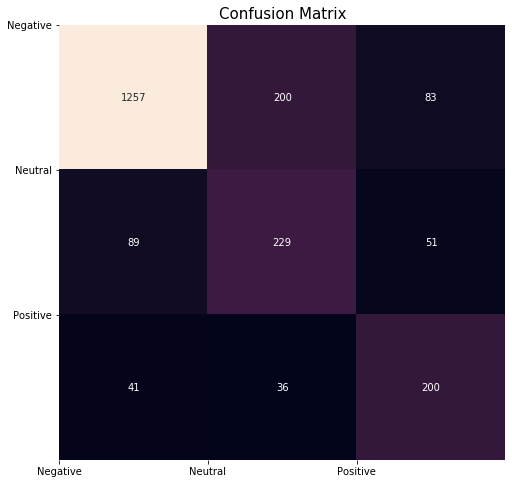

In [75]:
#Confusion Matrix for Test Set
cm_DF = confusion_matrix(y_test_predict_tf_idf, y_test_main_tf_idf)
plt.figure(figsize=(8,8))
sns.heatmap(cm_DF, annot=True,fmt='.0f',cbar=False)
plt.title('Confusion Matrix', fontsize=15)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'])
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'],rotation=0)
plt.show()

#### 6) Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks)

### Summary of pre-processing steps:

#### HTML tag removal:
- Unstructured text contains a lot of noise, particularly when extracting the data from methods like screen scraping. HTML tags are usually one of these components which do not add any value towards analyzing the text.

#### Contraction:
- Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe.

#### Tokenization:
- Tokenization is splitting the sentence into words.

#### Removing numbers:
- Remove numbers from list of tokenized words.

#### Remove special characters:
- Remove special characters from list of tokenized words.

#### Remove punctuation:
- Remove punctuation from list of tokenized words.

#### Convert text to lower case:
- Converting all text to the same case.

#### Remove empty strings:
- Remove empty string from list of tokenized words.

#### Stemming
- It is a process of transforming a word to its root form.

#### Lemmatization
- On the other hand, lemmatization reduces the words to a word existing in the language.

### Summary of Vectorization methods:
#### CountVectorization:
- CountVectorizer is used to convert a collection of text documents to a vector of token counts. It also enables the pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

#### TfidfVectorizer:
- It is a scheme to weight individual tokens. The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents.


### Summary of Model Performance:

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


Text(0.5, 1.0, 'Model Accuracies')

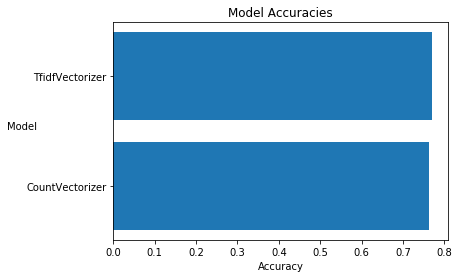

In [85]:
Acc=[]
Mdl=[]
Acc.append(randomforestclassifier.score(x_test_main, y_test_main))
Acc.append(randomforestclassifier_tf_idf.score(x_test_main_tf_idf, y_test_main_tf_idf))
Mdl.append("CountVectorizer")
Mdl.append("TfidfVectorizer")

indx=[0,1]
plt.barh(indx,Acc)
plt.yticks(indx,Mdl,rotation=0)
plt.xlabel('Accuracy')
plt.ylabel('Model').set_rotation(0)
plt.title('Model Accuracies')

In [77]:
Accuracy_CountVectorizer_DF = pd.DataFrame({'Method':['RandomForestClassfier on CountVectorizer'], 'Accuracy': randomforestclassifier.score(x_test_main, y_test_main)},index={'1'})
Accuracy_TfidfVectorizer_DF = pd.DataFrame({'Method':['RandomForestClassfier on TfidfVectorizer'], 'Accuracy': randomforestclassifier_tf_idf.score(x_test_main_tf_idf, y_test_main_tf_idf)},index={'2'})
resultsDf = pd.concat([Accuracy_TfidfVectorizer_DF, Accuracy_CountVectorizer_DF])

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


In [78]:
print('Note: The RandomForestClassfier on TfidfVectorizer has better accuracy.')
resultsDf

Note: The RandomForestClassfier on TfidfVectorizer has better accuracy.


Method  Accuracy
2  RandomForestClassfier on TfidfVectorizer  0.771272
1  RandomForestClassfier on CountVectorizer  0.763495

#### General Summary of tweets:

In [79]:
#Dataframe for each category
positive_DF = TW_DF['airline_sentiment'].str.contains("positive")
negative_DF = TW_DF['airline_sentiment'].str.contains("negative")
neutral_DF = TW_DF['airline_sentiment'].str.contains("neutral")

In [80]:
positive_tweets = TW_DF[positive_DF]
negative_tweets = TW_DF[negative_DF]
neutral_tweets = TW_DF[neutral_DF]

In [81]:
#Worst Airline
worst_airline = negative_tweets[['airline','airline_sentiment_confidence','negativereason']]
cnt_worst_airline = worst_airline.groupby('airline', as_index=False).count()
cnt_worst_airline.sort_values('negativereason', ascending=False)

airline  airline_sentiment_confidence  negativereason
4          United                          2633            2633
3      US Airways                          2263            2263
0        American                          1922            1922
2       Southwest                          1186            1186
1           Delta                           955             955
5  Virgin America                           181             181

In [82]:
#Best Airline
best_airline = positive_tweets[['airline','airline_sentiment_confidence']]
cnt_best_airline = best_airline.groupby('airline', as_index=False).count()
cnt_best_airline.sort_values('airline_sentiment_confidence', ascending=False)

airline  airline_sentiment_confidence
2       Southwest                           570
1           Delta                           544
4          United                           492
0        American                           318
3      US Airways                           269
5  Virgin America                           152

In [83]:
#Negative reason
motivation = negative_tweets[['airline','negativereason']]
cnt_bad_flight_motivation = motivation.groupby('negativereason', as_index=False).count()
cnt_bad_flight_motivation.sort_values('airline', ascending=False)

negativereason  airline
3       Customer Service Issue     2898
7                  Late Flight     1655
1                   Can't Tell     1190
2             Cancelled Flight      839
8                 Lost Luggage      718
0                   Bad Flight      580
6      Flight Booking Problems      529
5  Flight Attendant Complaints      479
9                    longlines      178
4              Damaged Luggage       74

#### Conclusion:
- RandomForestClassifier on TfidfVectorizer has better accuracy while RandomForestClassifier on CountVectorizer has less accuracy.
- Model predicts airline sentiment correctly 77% of the times.
- US Airways, United Airlines and American Airlines has the greatest number of negative reviews.
- Virgin America has the least number of negative reviews.
- Customer service and late flight is the reason why customers are giving bad feedback on twitter. 
- Southwest is the best airline in terms of sentiment confidence.